In [1]:
# setting logging to print only error messages
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette="Set2")

# Polynomial Regression

As we saw in experiments with Linear Regression on the California housing data, it performs quite poorly, as it is relies on the assumption that the price of a house can be described as a **linear combination** of some other variables, that is the target variable `y` can be predicted from:

$y = \alpha + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n$

But if the target does not appear to be linearly dependent on other variable, one can attempt to fit a non-linear model. This can be achieved by adding extra variables which are the original variables taken to a power:

$y = \alpha + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \beta_4 x_2^2 + ... $

Let's take a look at an example.

In [2]:
# number of points
m = 100

# x coordinates: -3 + 6 * an array with the shape (100, 1)
# containing random numbers between 0 and 1
X = 6 * np.random.rand(m, 1) - 3

# y coordinates
y = 2 + 0.5 * X**2 + X + np.random.randn(m, 1)

So we've generated points using this equation:

$y = 2 + 0.5x^2 + x + e$

where $e$ is a certain random amount between 0 and 1.

In [3]:
X.shape

(100, 1)

There are 100 rows in one column in the array `X`.

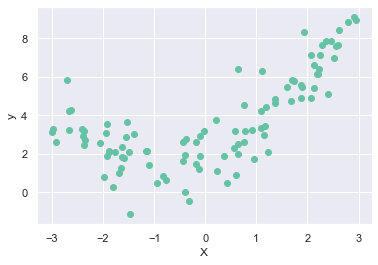

In [4]:
# plot the points
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Clearly, a linear model will not fit the data points well.

We can use Scikit-Learn’s `PolynomialFeatures` class to adding the square (2nd-degree polynomial) of each feature (in this case the single feature, `X`):

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# initialize transformer (include_bias set to False not to add an extra column of 1's)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# fit the transformer and immediately use it to transform X:
X_poly = poly_features.fit_transform(X)

X_poly.shape

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


(100, 2)

`X_poly` now contains 100 rows and two columns: the first column is the original value in `X` and the second column is its square:

In [6]:
# the first row
X_poly[0]

array([2.40001805, 5.76008662])

Now we can fit a linear regression to `X`:

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.98292182]), array([[0.91435074, 0.53204316]]))

So the estimated equation is:

$y = 2.11 + 0.97x + 0.5x^2$

I.e., the fitted equation was able to largely recover the formula we used to generate the data originally.

We can also plot the fitted regression:

In [8]:
Xf = np.arange(-3, 3, 0.01)
yf = 2.11 + 0.5 * Xf**2 + 0.97 * Xf

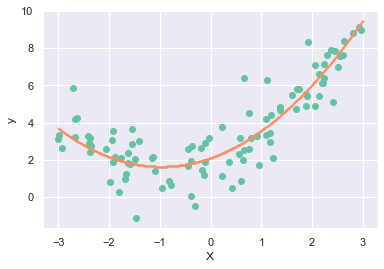

In [9]:
plt.scatter(X, y)
plt.scatter(Xf, yf, s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Acknowledgement

The notebook is based on the code examples from [Aurélien Géron's textbook](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow".


# Citing this notebook

If you use this notebook in your work, please cite it as follows:
    
Pekar, V. (2024). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm
